In [1]:
import pandas as pd           
import praw                   
import re                     
import datetime as dt
import seaborn as sns
import requests
import json
import sys
import time
import os
from bs4 import BeautifulSoup
from datetime import timezone, datetime

'''

The purpose of this code is to clean up the downloaded data frame, by converting html into text, 
and removing uninteresting columns.

'''


'\n\nThe purpose of this code is to clean up the downloaded data frame, by converting html into text, \nand removing uninteresting columns.\n\n'

In [2]:
subreddit_df = pd.read_pickle("Data_2021/2021wsb.pkl")

In [3]:
def extract_text(s):
    if s == None:
        return None
    soup = BeautifulSoup(s)
    return soup.get_text()

subreddit_df["selftext"] = subreddit_df["selftext_html"].apply(extract_text)

In [4]:
def date(created):
    # Converts the timestamp to UTC time
    return datetime.utcfromtimestamp(created).replace(tzinfo=timezone.utc)

subreddit_df["created_datetime"] = subreddit_df["created_utc"].apply(date)

In [5]:
list(subreddit_df.columns)

['comment_limit',
 'comment_sort',
 '_reddit',
 'approved_at_utc',
 'subreddit',
 'selftext',
 'author_fullname',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'top_awarded_type',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'user_reports',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'author_premium',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'author_flair_richtext',
 'gildings',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_category',
 'banned_by',
 'autho

In [15]:
cols = [ 'title', "created_datetime", 'created_utc', 'selftext', 'selftext_html', 'author', 'author_fullname', 'upvote_ratio',  'ups', 'total_awards_received', 'is_self', 'id', 'num_comments', 'url', 'is_video']
subreddit_cleaned = subreddit_df[cols]

In [16]:
subreddit_cleaned.to_pickle('wsb_cleaned.pkl')

In [ ]:
sns.pairplot( subreddit_cleaned.select_dtypes(include='number'))

<AxesSubplot:xlabel='created_datetime', ylabel='ups'>

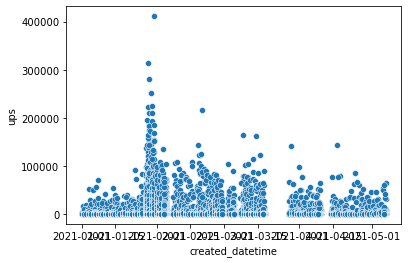

In [8]:
sns.scatterplot(data = subreddit_cleaned[subreddit_cleaned.ups > 40], x = "created_datetime", y = "ups")

<AxesSubplot:xlabel='created_datetime', ylabel='num_comments'>

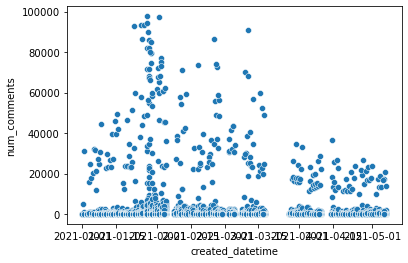

In [9]:
sns.scatterplot(data = subreddit_cleaned[subreddit_cleaned.ups > 40], x = "created_datetime", y = "num_comments")

<AxesSubplot:xlabel='num_comments', ylabel='ups'>

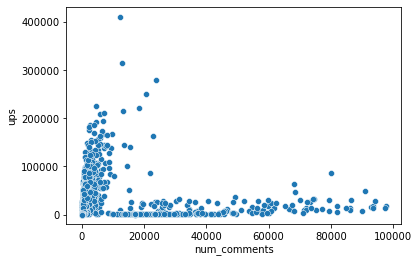

In [11]:
sns.scatterplot(data = subreddit_cleaned[subreddit_cleaned.ups > 40], x = "num_comments", y = "ups")

In [ ]:
sns.lmplot(data = subreddit_cleaned[subreddit_cleaned.ups > 40], x = "total_awards", y = "ups")

In [ ]:
winter